# Best two markets to advertise E-Learning courses

In this project, we are going to analyze which are the best two markets to invest in advertising for online courses in programming and which programming topics the courses should be based on. 

In order to do this, we are going to use the data from data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a web platform for free E-Learning in a variety of courses like Web Development, Data Science and more. The dataset can be found in [here](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv).

## Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 150

In [2]:
new_coders = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0) # the low_memory is to avoid warning messages
new_coders.shape

(18175, 136)

In [3]:
new_coders.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

The dataset contains 18,175 rows and 136 columns. 

## Data preparation

The dataset contains too many rows that are not in the interest of the analysis, so we are going to isolate the important columns, that would be:
* CountryCitizen	
* CountryLive
* JobRoleInterest
* MoneyForLearning
* MonthsProgramming


In [7]:
new_coders_prp = new_coders[['CountryCitizen', 'CountryLive', 'JobRoleInterest', 'MoneyForLearning', 'MonthsProgramming']].copy()

Let's see if the new isolated dataset contains null values.

In [8]:
new_coders_prp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CountryCitizen     15382 non-null  object 
 1   CountryLive        15336 non-null  object 
 2   JobRoleInterest    6992 non-null   object 
 3   MoneyForLearning   16577 non-null  float64
 4   MonthsProgramming  17084 non-null  float64
dtypes: float64(2), object(3)
memory usage: 710.1+ KB


All the columns contain null values. 

For the case of the MoneyForLearning, MonthsProgramming, JobRoleInterest columns we are going to remove the null because there is no way to know that information. 

For the CountryLive column we are going to fill some null values assuming that the CountryCitizen and CountryLive are the same, the rest is going to be removed. 

In [9]:
# remove rows with null values in MoneyForLearning and MonthsProgramming
new_coders_prp = new_coders_prp[new_coders_prp['MoneyForLearning'].notna()]
new_coders_prp = new_coders_prp[new_coders_prp['MonthsProgramming'].notna()]
new_coders_prp = new_coders_prp[new_coders_prp['JobRoleInterest'].notna()]

# replace null values in CountryLive wity CountryCitizen values
for index, row in new_coders_prp.iterrows():
    if pd.isnull(row['CountryLive']):
        new_coders_prp.at[index,'CountryLive'] = row['CountryCitizen']
        
# remove rows with the residual null values in CountryLive
new_coders_prp = new_coders_prp[new_coders_prp['CountryLive'].notna()]

In [10]:
new_coders_prp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6253 entries, 1 to 18171
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CountryCitizen     6217 non-null   object 
 1   CountryLive        6253 non-null   object 
 2   JobRoleInterest    6253 non-null   object 
 3   MoneyForLearning   6253 non-null   float64
 4   MonthsProgramming  6253 non-null   float64
dtypes: float64(2), object(3)
memory usage: 293.1+ KB


The CountryCitizen column still contains some null values but this one doesn't matter for the analysis, as we want to know the best market based on where the new coders actually live. 



## Data analysis
### Topics of interest for new coders
First, we would like to know which are the topics that new coders are more interested in learning online. In order to do this, we are going to use the JobRoleInterested column, this because if someone is interested in working in some area, it also means there is interest in learning in that field. 

Let's create a plot of the percentage of mentions of a topic in the interests of the new coders.


In [11]:
# dictionary for counting the topics
interest_count = {}

# transforming the JobRoleInterest by removing some character, lowercasing and spliting in a list for the count. 
job_interests =  new_coders_prp['JobRoleInterest'].str.replace('-', ' ').str.lower().str.split(',')

# iteration over each row and each interest/topic to increase the value in the dict. 
for row in job_interests:
    for interest in row:
        interest = interest.strip()
        interest_count[interest] = interest_count.get(interest, 0) + 1
        
# converting the dictionary to a DataFrame for better handling. 
interest_df = pd.DataFrame(interest_count.items())

# giving format to the Dataframe
interest_df.rename(columns={0:'Interest', 1:'Count'}, inplace=True)
interest_df.sort_values('Count', inplace=True, ascending=False)

# generate the percentage of interest for each topic
interest_df['Percentage'] = round((interest_df.Count/interest_df.Count.sum())*100,2)

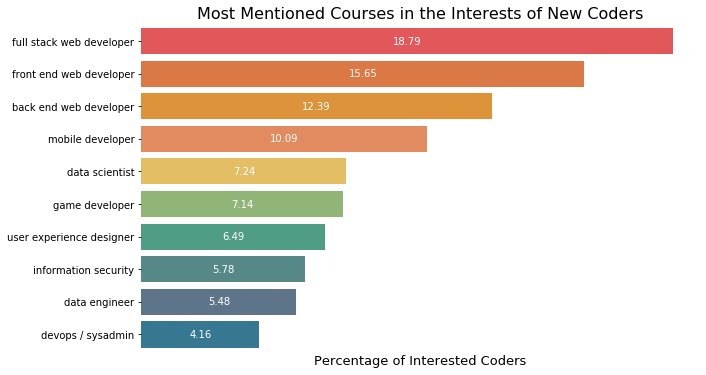

In [20]:
# generating the horizontal bar plot
palette=["#f94144","#f3722c","#f8961e","#f9844a","#f9c74f","#90be6d","#43aa8b","#4d908e","#577590","#277da1"]
sns.set_palette(palette)
f, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="Percentage", y="Interest", data=interest_df.iloc[:10], palette=sns.color_palette())
sns.despine(top=True, right=True, left=True, bottom=True)
ax.set_title('Most Mentioned Courses in the Interests of New Coders',fontdict={'fontsize':'16'} )
for patch in ax.patches:
    weight, height = patch.get_width(), patch.get_height()
    ax.text(weight * .5, patch.get_y() + 0.5 * height, weight, horizontalalignment='center', verticalalignment='center', fontsize="medium", color='w')    
ax.set_ylabel('')
ax.set_xticks([])
ax.set_xlabel('Percentage of Interested Coders', fontdict={'fontsize':'13'})
plt.show()

It is pretty clear that web development is the topic with most interests within the new coders (around 46%), followed by mobile development with 10.09% and data science with 7.24%.

So, the advertising should be done focused on these three courses or just the first two.

### Location of the markets to advertise
Now, that we know which are the courses with more interest to people that is starting to code. We need to identify which country would be the best to invest in the advertising. We can determine this taking in account:
* Number of people that is starting to learn code.
* How much are they willing to pay for the learning?

First, let's take a look on the top 20 countries with more new coders. 

In [22]:
count = new_coders_prp['CountryLive'].value_counts()
percentage = new_coders_prp['CountryLive'].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Count': count, 
                     'Percentage': percentage}
            )[:20]

,Count,Percentage
United States of America,2952,47.209340
India,466,7.452423
United Kingdom,282,4.509835
Canada,240,3.838158
Poland,122,1.951063
Germany,114,1.823125
Brazil,111,1.775148
Australia,103,1.647209
Russia,79,1.263394
Ukraine,79,1.263394


The top country with the newest coders is the United States, followed by India, United Kingdom and Canada. These four countries share more than 60% percent of the new coders in the freeCodeCamp survey.

So, we are going to focus on them, and also because the majority of courses online are in English and these four countries have English as one of their official language. 

In [23]:
new_coders_eng = new_coders_prp[(new_coders_prp['CountryLive']=='United States of America')|(new_coders_prp['CountryLive']=='India')|
                          (new_coders_prp['CountryLive']=='United Kingdom')|(new_coders_prp['CountryLive']=='Canada')].copy()

### Money Spending for Learning
Now, we are going to calculate the average spending of each of the four countries on E-Learning per month, this in order to size which market would be more profitable for the advertising. 

In [28]:
# replacing 0s with 1 to avoid a divition by 0
new_coders_eng.MonthsProgramming = new_coders_eng.MonthsProgramming.apply(lambda x: 1 if x<1 else x)
# calculation of Money Per Month
new_coders_eng['MoneyPerMonth'] = new_coders_eng.MoneyForLearning/new_coders_eng.MonthsProgramming
# group and calculation of the mean of the Money Per Month by Countty
mean_money_month = new_coders_eng.groupby('CountryLive')['MoneyPerMonth'].agg('mean')
mean_money_month.sort_values(ascending=False)

CountryLive
United States of America    227.851420
India                       134.318858
Canada                      113.510961
United Kingdom               45.144597
Name: MoneyPerMonth, dtype: float64

The top spending country in E-Learning is the United States, and this makes sense with the amount of people and strong economy. But the United Kingdom is significantly below of the rest, suggesting that there are some outliers in the data. 

We are going to make a boxplot of the distribution of the Money spent per month for each country on E-Learning to see if there are some outliers. 

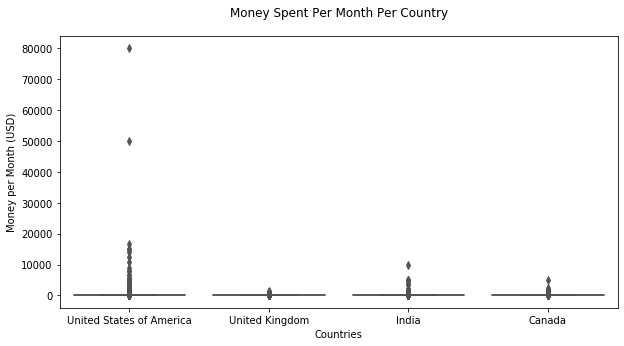

In [30]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data=new_coders_eng)
plt.title('Money Spent Per Month Per Country', y=1.05)
plt.ylabel('Money per Month (USD)')
plt.xlabel('Countries')
plt.show()

As seen above, in fact there are outliers in the data. Even with a strong economy, it is unreal that someone is spending 80,000 USD per month in programming courses online. 

We need to remove the outliers to have a good estimate of the average spending in online courses per country.

The outlier’s removal is going to be carried on by using the z-score of each distribution and removing everything that is higher than 3 z-scores. 

In [32]:
# sort of the rows in the dataframe by country to ease the removal of outliers
new_coders_eng.sort_values(by='CountryLive', axis=0, inplace=True)
print(len(new_coders_eng))


3940


In [33]:
from scipy import stats
# calculation of the z-scores for each country distribution
z_mpm_ca = np.abs(stats.zscore(new_coders_eng.loc[new_coders_eng.CountryLive=='Canada','MoneyPerMonth']))
z_mpm_us = np.abs(stats.zscore(new_coders_eng.loc[new_coders_eng.CountryLive=='United States of America','MoneyPerMonth']))
z_mpm_uk = np.abs(stats.zscore(new_coders_eng.loc[new_coders_eng.CountryLive=='United Kingdom','MoneyPerMonth']))
z_mpm_ind = np.abs(stats.zscore(new_coders_eng.loc[new_coders_eng.CountryLive=='India','MoneyPerMonth']))

# generation of a boolean mask per country
filter_ca = z_mpm_ca < 3
filter_ind = z_mpm_ind < 3
filter_uk = z_mpm_uk < 3
filter_us = z_mpm_us < 3

# merge of the boolean mask into one
filters = np.concatenate([filter_ca, filter_ind, filter_uk, filter_us])

In [35]:
# application of the merged boolean mask to remove the outliers
new_coders_eng_filt = new_coders_eng[filters].copy()

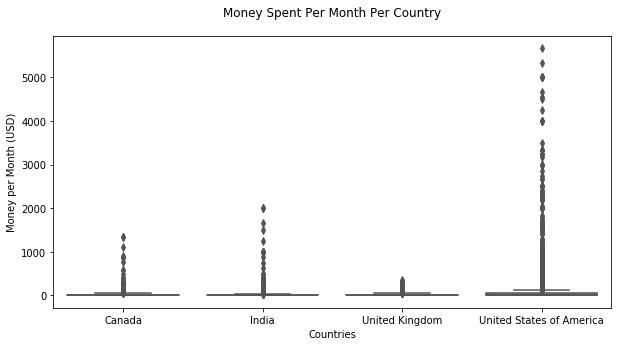

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data=new_coders_eng_filt)
plt.title('Money Spent Per Month Per Country', y=1.05)
plt.ylabel('Money per Month (USD)')
plt.xlabel('Countries')
plt.show()

After the removal, we still see some outliers in the data, but the values are not unreal, someone can spend high amounts of money if they attend to Bootcamps while also taking courses. So, we will consider those values real and possible. 

With the cleaning of the distributions, let's now plot the average spending of money per month in online courses and the countries with the newest coders. 

In [37]:
mean_money_month_2 = new_coders_eng_filt.groupby('CountryLive')['MoneyPerMonth'].agg('mean')

In [40]:
new_c = new_coders_eng_filt.CountryLive.value_counts()
new_c.sort_index(inplace=True)

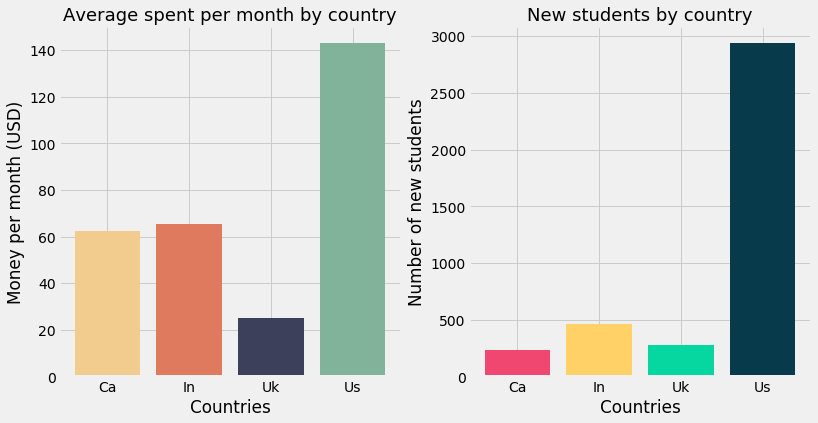

In [41]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax[0].bar(['Ca', 'In', 'Uk', 'Us'], height=mean_money_month_2, color=['#f2cc8f', '#e07a5f','#3d405b','#81b29a'])
ax[0].set_ylabel('Money per month (USD)')
ax[0].set_xlabel('Countries')
ax[0].set_title('Average spent per month by country',fontdict={'fontsize':18})
ax[1].bar(['Ca', 'In', 'Uk', 'Us'], height=new_c, color=['#ef476f', '#ffd166','#06d6a0','#073b4c'])
ax[1].set_ylabel('Number of new students')
ax[1].set_xlabel('Countries')
ax[1].set_title('New students by country',fontdict={'fontsize':18})
plt.show()

By looking the graph above, it is obvious that the best market to advertise an online programming course is the US, as they have the highest number of new coders but also the highest spending per month in online learning. 

The next question would be which is the second-best market to advertise the online courses. This will be in between India and Canada, both having around the same spending per month (around 60 USD) but India having more new coders than Canada (almost double). This leads us to suggest than India would be the second market to invest in advertising.

## Conclusion
By carrying this analysis, we conclude that the best two markets to invest in advertising for online programming courses are US and India. 

The advertising should be focused on all the spectrums of Web Development and in Mobile Development and Data science, as these three topics are the ones with the more interest for the people who is looking to learn how to code. 